<a href="https://colab.research.google.com/github/rijjahussain/ngs_qc_pipeline_project/blob/main/NGS_QC_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary packages for the pipeline
!apt-get update
!apt-get install -y fastqc bwa samtools bcftools trim-galore sra-toolkit
!pip install biopython


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [73.0 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,694 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,243 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRe

In [2]:
# Download the FASTQ files from NCBI SRA using SRA Toolkit
!prefetch ! SRR2584863

# Convert SRA file to FASTQ format using fastq-dump
!fasterq-dump SRR2584863 --split-files

# Check the downloaded FASTQ files
import os
os.listdir()



2025-04-16T07:03:56 prefetch.2.11.3 err: libs/vfs/names4-response.c:1944:ContainerProcessStatus: name not found while resolving query within virtual file system module - failed to resolve accession '!' - Cannot resolve accession ( 404 )
2025-04-16T07:03:56 prefetch.2.11.3: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.

2025-04-16T07:03:56 prefetch.2.11.3: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2025-04-16T07:03:57 prefetch.2.11.3: 2) Downloading 'SRR2584863'...
2025-04-16T07:03:57 prefetch.2.11.3: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2025-04-16T07:03:57 prefetch.2.11.3:  Downloading via HTTPS...
2025-04-16T07:04:18 prefetch.2.11.3:  HTTPS download succeed
2025-04-16T07:04:20 prefetch.2.11.3:  'SRR2584863' is valid
2025-04-16T07:04:20 prefetch.2.11.3: 2) 'SRR2584863' was downloaded su

['.config',
 'SRR2584863_2.fastq',
 'SRR2584863_1.fastq',
 'SRR2584863',
 'sample_data']

In [3]:
# Make sure the output folder exists
!mkdir -p fastqc_reports

# Run FastQC on both FASTQ files
!fastqc SRR2584863_1.fastq SRR2584863_2.fastq --outdir=fastqc_reports


Started analysis of SRR2584863_1.fastq
Approx 5% complete for SRR2584863_1.fastq
Approx 10% complete for SRR2584863_1.fastq
Approx 15% complete for SRR2584863_1.fastq
Approx 20% complete for SRR2584863_1.fastq
Approx 25% complete for SRR2584863_1.fastq
Approx 30% complete for SRR2584863_1.fastq
Approx 35% complete for SRR2584863_1.fastq
Approx 40% complete for SRR2584863_1.fastq
Approx 45% complete for SRR2584863_1.fastq
Approx 50% complete for SRR2584863_1.fastq
Approx 55% complete for SRR2584863_1.fastq
Approx 60% complete for SRR2584863_1.fastq
Approx 65% complete for SRR2584863_1.fastq
Approx 70% complete for SRR2584863_1.fastq
Approx 75% complete for SRR2584863_1.fastq
Approx 80% complete for SRR2584863_1.fastq
Approx 85% complete for SRR2584863_1.fastq
Approx 90% complete for SRR2584863_1.fastq
Approx 95% complete for SRR2584863_1.fastq
Analysis complete for SRR2584863_1.fastq
Started analysis of SRR2584863_2.fastq
Approx 5% complete for SRR2584863_2.fastq
Approx 10% complete for

In [4]:
# Install MultiQC if needed
!pip install multiqc

# Run MultiQC on FastQC reports
!multiqc fastqc_reports -o multiqc_output


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.8 MB/s eta 0:00:00

/// ]8;id=859669;https://multiqc.info\MultiQC]8;;\ 🔍 v1.28

       file_search | Search path: /content/fastqc_reports
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 4/4  
            fastqc | Found 2 reports
            violin | Tried to make table/violin plot, but had no data. pconfig: {'namespace': 'FastQC', 'id': 'fastqc_top_overrepresented_sequences_table', 'title': 'FastQC: Top overrepresented sequences', 'col1_header': 

In [1]:
# Install pip for Python3 (if it's not installed already)
!apt-get install -y python3-pip

# Install cutadapt (Trim Galore requires this)
!pip install cutadapt

# Download Trim Galore (GitHub source)
!wget https://github.com/FelixKrueger/TrimGalore/archive/refs/heads/master.zip

# Unzip the Trim Galore zip file
!unzip -o master.zip

# Move into the Trim Galore directory
%cd TrimGalore-master

# Install Trim Galore (this will install it for use in the Colab environment)
!python3 setup.py install

# Go back to your working directory
%cd ..


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-pip is already the newest version (22.0.2+dfsg-1ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
--2025-04-16 08:35:21--  https://github.com/FelixKrueger/TrimGalore/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/FelixKrueger/TrimGalore/zip/refs/heads/master [following]
--2025-04-16 08:35:21--  https://codeload.github.com/FelixKrueger/TrimGalore/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.4’

master.zip.4            [       <=> 

In [2]:
# Run Trim Galore on paired-end FASTQ files
!TrimGalore-master/trim_galore --paired SRR2584863_1.fastq SRR2584863_2.fastq -o qc_output


Multicore support not enabled. Proceeding with single-core trimming.
Path to Cutadapt set as: 'cutadapt' (default)
Traceback (most recent call last):
  File "/usr/bin/cutadapt", line 33, in <module>
    sys.exit(load_entry_point('cutadapt==3.5', 'console_scripts', 'cutadapt')())
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/bin/cutadapt", line 25, in importlib_load_entry_point
    return next(matches).load()
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/metadata/__init__.py", line 202, in load
    module = import_module(match.group('module'))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find

In [7]:
# Download a small reference genome (E. coli)
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/005/845/GCA_000005845.2_ASM584v2/GCA_000005845.2_ASM584v2_genomic.fna.gz
!gunzip GCA_000005845.2_ASM584v2_genomic.fna.gz

# Rename for simplicity
!mv GCA_000005845.2_ASM584v2_genomic.fna ecoli_ref.fasta

# Index the reference genome for BWA
!bwa index ecoli_ref.fasta


--2025-04-16 07:22:33--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/005/845/GCA_000005845.2_ASM584v2/GCA_000005845.2_ASM584v2_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.31, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1379898 (1.3M) [application/x-gzip]
Saving to: ‘GCA_000005845.2_ASM584v2_genomic.fna.gz’

GCA_000005845.2_ASM 100%[===================>]   1.32M  1.20MB/s    in 1.1s    

2025-04-16 07:22:35 (1.20 MB/s) - ‘GCA_000005845.2_ASM584v2_genomic.fna.gz’ saved [1379898/1379898]

[bwa_index] Pack FASTA... 0.06 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 2.04 seconds elapse.
[bwa_index] Update BWT... 0.03 sec
[bwa_index] Pack forward-only FASTA... 0.02 sec
[bwa_index] Construct SA from BWT and Occ... 0.95 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index ecoli_ref.fasta
[main

In [17]:
import os
os.listdir('qc_output')

FileNotFoundError: [Errno 2] No such file or directory: 'qc_output'

In [16]:
# Align trimmed reads with BWA
!bwa mem ecoli_ref.fasta qc_output/SRR2584863_1_val_1.fq qc_output/SRR2584863_2_val_2.fq > aligned_reads.sam


[M::bwa_idx_load_from_disk] read 0 ALT contigs
[E::main_mem] fail to open file `qc_output/SRR2584863_1_val_1.fq'.


In [13]:
# Convert SAM to BAM, sort and index
!samtools view -bS aligned_reads.sam > aligned_reads.bam
!samtools sort aligned_reads.bam -o sorted_reads.bam
!samtools index sorted_reads.bam


[main_samview] fail to read the header from "aligned_reads.sam".
samtools sort: failed to read header from "aligned_reads.bam"
[E::hts_open_format] Failed to open file "sorted_reads.bam" : No such file or directory
samtools index: failed to open "sorted_reads.bam": No such file or directory


In [14]:
# Call variants
!bcftools mpileup -f ecoli_ref.fasta sorted_reads.bam | bcftools call -mv -Ov -o raw_variants.vcf


Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[E::hts_open_format] Failed to open file "sorted_reads.bam" : No such file or directory
[mpileup] failed to open sorted_reads.bam: No such file or directory
Failed to read from standard input: unknown file type


In [48]:
# Filter variants (e.g., QUAL > 30)
!bcftools view -i 'QUAL>30' raw_variants.vcf > filtered_variants.vcf

In [49]:
# View first 20 lines of the VCF file
!head -n 20 filtered_variants.vcf


##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f ecoli_ref.fasta sorted_reads.bam
##reference=file://ecoli_ref.fasta
##contig=<ID=U00096.3,length=4641652>
##ALT=<ID=*,Description="Represents allele(s) other than observed.">
##INFO=<ID=INDEL,Number=0,Type=Flag,Description="Indicates that the variant is an INDEL.">
##INFO=<ID=IDV,Number=1,Type=Integer,Description="Maximum number of raw reads supporting an indel">
##INFO=<ID=IMF,Number=1,Type=Float,Description="Maximum fraction of raw reads supporting an indel">
##INFO=<ID=DP,Number=1,Type=Integer,Description="Raw read depth">
##INFO=<ID=VDB,Number=1,Type=Float,Description="Variant Distance Bias for filtering splice-site artefacts in RNA-seq data (bigger is better)",Version="3">
##INFO=<ID=RPBZ,Number=1,Type=Float,Description="Mann-Whitney U-z test of Read Position Bias (closer to 0 is better)">
##INFO=<ID=MQBZ,Number=1,Type=Float,Description="Mann-

In [51]:
import pandas as pd

# Load VCF into pandas, skip comment lines starting with '#'
vcf_df = pd.read_csv("filtered_variants.vcf", comment='#', sep='\t', header=None)


# Show first few rows
vcf_df.head()


,0,1,2,3,4,5,6,7,8,9
0,U00096.3,301,.,CTTTTTTTTT,CTTTTTTTT,227.412,.,INDEL;IDV=57;IMF=0.850746;DP=67;VDB=0.00167195...,GT:PL,"1/1:254,157,0"
1,U00096.3,393,.,T,G,225.417,.,DP=44;VDB=0.701618;SGB=-0.693145;FS=0;MQ0F=0;A...,GT:PL,"1/1:255,120,0"
2,U00096.3,588,.,G,A,225.417,.,DP=55;VDB=0.00475609;SGB=-0.693147;FS=0;MQ0F=0...,GT:PL,"1/1:255,151,0"
3,U00096.3,774,.,T,C,225.417,.,DP=55;VDB=0.682547;SGB=-0.693147;FS=0;MQ0F=0;A...,GT:PL,"1/1:255,163,0"
4,U00096.3,867,.,C,T,225.417,.,DP=43;VDB=0.703409;SGB=-0.693145;FS=0;MQ0F=0;A...,GT:PL,"1/1:255,123,0"


In [53]:
# Load VCF again (skipping comment lines)
vcf = pd.read_csv('filtered_variants.vcf', comment='#', sep='\t', header=None)

# See how many columns we got
vcf.shape  # (rows, columns)


(34571, 10)

In [54]:
vcf.columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']


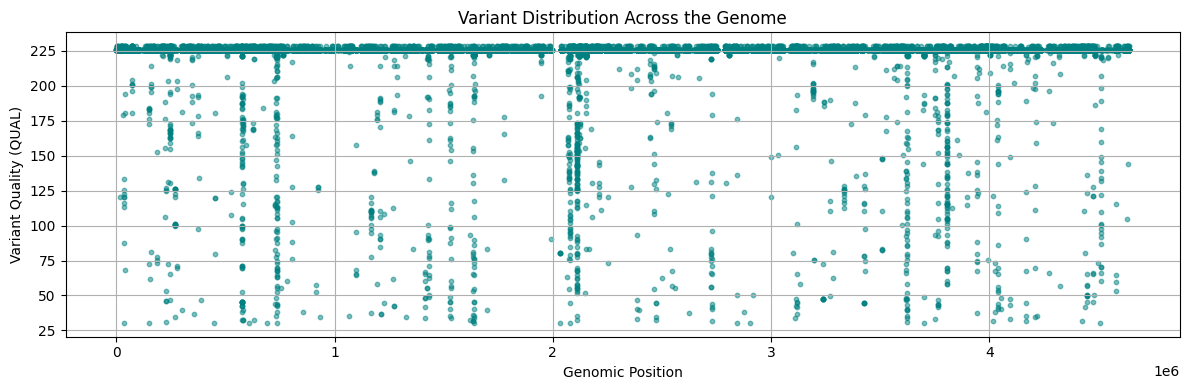

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.scatter(vcf['POS'], vcf['QUAL'], alpha=0.5, s=10, color='teal')
plt.title('Variant Distribution Across the Genome')
plt.xlabel('Genomic Position')
plt.ylabel('Variant Quality (QUAL)')
plt.grid(True)
plt.tight_layout()
plt.show()


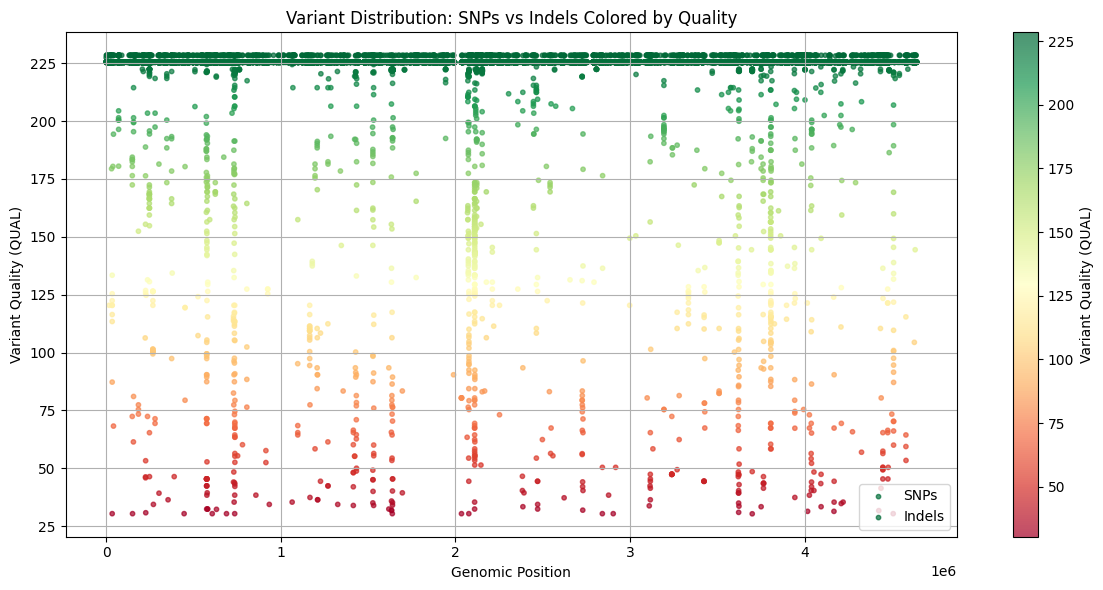

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Separate SNPs and Indels
vcf['TYPE'] = vcf['ALT'].apply(lambda x: 'SNP' if len(str(x)) == 1 else 'Indel')

# Create a color map based on quality score
norm = plt.Normalize(vmin=vcf['QUAL'].min(), vmax=vcf['QUAL'].max())
cmap = plt.get_cmap('RdYlGn')  # Red to Green color map

# Plot SNPs and Indels separately
plt.figure(figsize=(12, 6))

# Plot SNPs
snp_data = vcf[vcf['TYPE'] == 'SNP']
sc_snp = plt.scatter(snp_data['POS'], snp_data['QUAL'], alpha=0.7, s=10,
                     c=snp_data['QUAL'], cmap=cmap, norm=norm, label='SNPs')

# Plot Indels
indel_data = vcf[vcf['TYPE'] == 'Indel']
sc_indel = plt.scatter(indel_data['POS'], indel_data['QUAL'], alpha=0.7, s=10,
                       c=indel_data['QUAL'], cmap=cmap, norm=norm, label='Indels')

# Add color bar (using the scatter objects to create the color map)
cbar = plt.colorbar(sc_snp)
cbar.set_label('Variant Quality (QUAL)')

# Add labels and legend
plt.title('Variant Distribution: SNPs vs Indels Colored by Quality')
plt.xlabel('Genomic Position')
plt.ylabel('Variant Quality (QUAL)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
